## Import packages

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.ensemble import ExtraTreesRegressor

## Step I. Load data

In [4]:
train = pd.read_csv('train.csv')
X_test = pd.read_csv('X_test.csv')

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

## Step II. Build the model and perform parameter tuning

In [5]:
def modelfit(clf, train, target, performCV=True, cv=10, printFeatureImportance=True):
    clf.fit(train, target)
    pred = clf.predict(train)
    train_r2_score = r2_score(target, pred)
    
    print('\nModel Report')
    print('Train_coef_of_det: %0.6f' %(train_r2_score))
    
    if performCV:
        cv_r2_score = cross_val_score(clf, train, target, cv=cv, scoring='r2', n_jobs=-1)
        print('CV_coef_of_det: Mean-%0.6f | Std-%0.6f | Min-%0.6f | Max-%0.6f' %(np.mean(cv_r2_score),
            np.std(cv_r2_score), np.min(cv_r2_score), np.max(cv_r2_score)))
        
    if printFeatureImportance:
        feat_imp = pd.Series(clf.feature_importances_, 
                             index=train.columns.to_series().tolist()).sort_values(ascending=False)
        rcParams['figure.figsize'] = 20, 6
        feat_imp.plot(kind='bar')
        plt.title('Feature importance')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.show()        

### Baseline model

In [5]:
params = {}
grid = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.852520911095


In [6]:
params = {}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=10, criterion='mse', max_depth=None,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
        max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=False, oob_score=False, n_jobs=1,
        random_state=10, verbose=0, warm_start=False), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.846602744259


### Grid search

In [7]:
params = {}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=10, max_depth=None, 
        max_features='auto', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.846602744259


In [9]:
params = {'n_estimators': range(10,210,10)}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=10, max_depth=None, 
        max_features='auto', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 200}
0.872921288489


In [10]:
params = {'n_estimators': range(200,2000,100)}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=10, max_depth=None, 
        max_features='auto', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 200}
0.872921288489


In [11]:
params = {'n_estimators': range(200,310,10)}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=10, max_depth=None, 
        max_features='auto', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 270}
0.873095097006


In [12]:
params = {'max_depth': range(2,11)}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features='auto', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'max_depth': 10}
0.864277550093


In [10]:
params = {'max_features': [i/10.0 for i in range(1,11)]}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features='auto', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'max_features': 1.0}
0.873095097006


In [9]:
params = {'max_features': [i/100.0 for i in range(94,101)]}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features='auto', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'max_features': 1.0}
0.873095097006


In [11]:
params = {'min_samples_split': range(2,9)}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features=1.0, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_samples_split': 2}
0.873095097006


In [12]:
params = {'min_samples_leaf': range(1,9)}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features=1.0, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_samples_leaf': 1}
0.873095097006


In [17]:
params = {'min_weight_fraction_leaf': [i/10.0 for i in range(0,6)]}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features=1.0, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_weight_fraction_leaf': 0.0}
0.873095097006


In [18]:
params = {'min_weight_fraction_leaf': [i/100.0 for i in range(0,7)]}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features=1.0, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_weight_fraction_leaf': 0.0}
0.873095097006


In [19]:
params = {'min_weight_fraction_leaf': [i/1000.0 for i in range(0,7)]}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features=1.0, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_weight_fraction_leaf': 0.0}
0.873095097006


In [20]:
params = {'min_impurity_split': [10**(-i) for i in range(0,11)]}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features=1.0, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_impurity_split': 1}
0.873095097006


In [21]:
params = {'bootstrap': [True,False]}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features=1.0, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'bootstrap': False}
0.873095097006


In [23]:
params = {'oob_score': [True,False]}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features=1.0, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=True, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'oob_score': True}
0.867371174489


### Final model

In [24]:
params = {}
grid = GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features=1.0, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.873095097006



Model Report
Train_coef_of_det: 0.999997
CV_coef_of_det: Mean-0.873095 | Std-0.050587 | Min-0.738887 | Max-0.920352


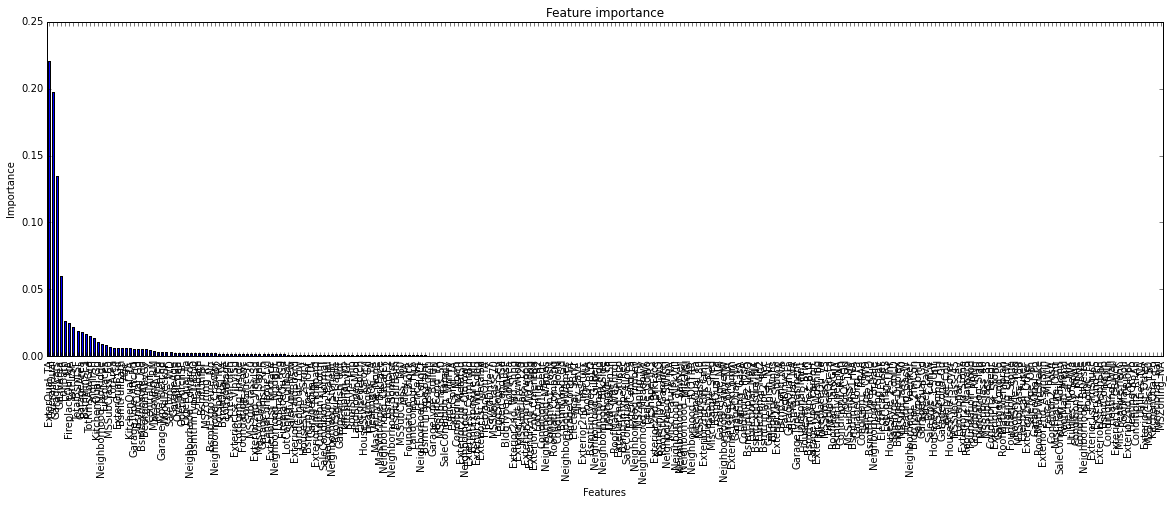

In [25]:
reg1 = ExtraTreesRegressor(n_estimators=270, max_depth=None, 
        max_features=1.0, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
        min_impurity_split=1e-07, bootstrap=False, oob_score=False, max_leaf_nodes=None, criterion='mse', 
        n_jobs=-1, warm_start=False, verbose=0, random_state=10)
modelfit(reg1, X_train, y_train)

### Grid search + Random search

In [6]:
params = {
          'n_estimators': range(10,540,10),
          'max_depth': [None],
          'max_features': [i/10.0 for i in range(1,11)],
          'min_samples_split': range(2,9),
          'min_samples_leaf': range(1,9),
          'min_weight_fraction_leaf': [i/100.0 for i in range(0,6)],
          'min_impurity_split': [i/10**8 for i in range(1,101,10)],
          'bootstrap': [True,False],
          'oob_score': [False],
          'max_leaf_nodes': [None],
          'criterion': ['mse'],
          'n_jobs': [-1],
          'warm_start': [True],
          'verbose': [0],
          'random_state': [10]
         }
rand = RandomizedSearchCV(estimator=ExtraTreesRegressor(), param_distributions=params, cv=10, scoring='r2',
         n_iter=1000, random_state=10, n_jobs=-1)
rand.fit(X_train, y_train)
print 'Best parameters: \n', rand.best_params_
print '\tBest score: ', rand.best_score_

Best parameters: 
{'warm_start': True, 'oob_score': False, 'n_jobs': -1, 'min_impurity_split': 0, 'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 150, 'max_features': 0.7, 'random_state': 10, 'criterion': 'mse', 'min_weight_fraction_leaf': 0.0, 'max_leaf_nodes': None, 'min_samples_split': 2, 'max_depth': None}
	Best score:  0.870541190551


In [ ]:
params = {}
reg1 = ExtraTreesRegressor(
                            n_estimators = params['n_estimators'],
                            max_depth = params['max_depth'],
                            max_features = params['max_features'],
                            min_samples_split = params['min_samples_split'],
                            min_samples_leaf = params['min_samples_leaf'],
                            min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                            min_impurity_split = params['min_impurity_split'],
                            bootstrap = params['bootstrap'],
                            oob_score = params['oob_score'],
                            max_leaf_nodes = params['max_leaf_nodes'],
                            criterion = params['criterion'],
                            n_jobs = params['n_jobs'],
                            warm_start = params['warm_start'],
                            verbose = params['verbose'],
                            random_state = params['random_state']
                            )
modelfit(reg1, X_train, y_train)

### Grid search + Bayesian optimization ( 'hyperopt' package )

In [27]:
min_score = float('inf')
best_params = ''
c = 0

def score(params):
    global c, min_score, best_params
    c += 1
    print "Interation no.: ", c
    print "Training with params : "
    print params
    reg = ExtraTreesRegressor(
                            n_estimators = params['n_estimators'],
                            max_depth = params['max_depth'],
                            max_features = params['max_features'],
                            min_samples_split = params['min_samples_split'],
                            min_samples_leaf = params['min_samples_leaf'],
                            min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                            min_impurity_split = params['min_impurity_split'],
                            bootstrap = params['bootstrap'],
                            oob_score = params['oob_score'],
                            max_leaf_nodes = params['max_leaf_nodes'],
                            criterion = params['criterion'],
                            n_jobs = params['n_jobs'],
                            warm_start = params['warm_start'],
                            verbose = params['verbose'],
                            random_state = params['random_state']
                            )
    cv_r2_score = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2', n_jobs=-1)
    score = 1 - np.mean(cv_r2_score) 
    if score < min_score:
        min_score = score
        best_params = params     
    print "\tScore: {0}".format(1-score)
    print "\tBest score: {0}\n".format(1-min_score)
    return {'loss': score, 'status': STATUS_OK}

def optimize():
    space = {
              'n_estimators': hp.choice('n_estimators', range(10,540,10)),
              'max_depth': hp.choice('max_depth', [None]),
              'max_features': hp.choice('max_features', [i/10.0 for i in range(1,11)]),
              'min_samples_split': hp.choice('min_samples_split', range(2,9)),
              'min_samples_leaf': hp.choice('min_samples_leaf', range(1,9)),
              'min_weight_fraction_leaf': hp.choice('min_weight_fraction_leaf', [i/100.0 for i in range(0,6)]),
              'min_impurity_split': hp.choice('min_impurity_split', [i/10**8 for i in range(1,101,10)]),
              'bootstrap': hp.choice('bootstrap', [True,False]),
              'oob_score': hp.choice('oob_score', [False]),
              'max_leaf_nodes': hp.choice('max_leaf_nodes', [None]),
              'criterion': hp.choice('criterion', ['mse']),
              'n_jobs': hp.choice('n_jobs', [-1]),
              'warm_start': hp.choice('warm_start', [True]),
              'verbose': hp.choice('verbose', [0]),
              'random_state': hp.choice('random_state', [10])      
            }
    best = fmin(score, space, algo=tpe.suggest, max_evals=1000)    
  
optimize()
print 'Best parameters:'
print best_params
print "\tScore {0}".format(1-min_score)

Interation no.:  1
Training with params : 
{'warm_start': True, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 8, 'n_estimators': 490, 'max_features': 0.3, 'min_weight_fraction_leaf': 0.05, 'criterion': 'mse', 'random_state': 10, 'min_impurity_split': 0, 'min_samples_split': 7, 'max_depth': None}
	Score: 0.723811114566
	Best score: 0.723811114566

Interation no.:  2
Training with params : 
{'warm_start': True, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': False, 'min_samples_leaf': 8, 'n_estimators': 310, 'max_features': 0.8, 'min_weight_fraction_leaf': 0.05, 'criterion': 'mse', 'random_state': 10, 'min_impurity_split': 0, 'min_samples_split': 3, 'max_depth': None}
	Score: 0.747077553214
	Best score: 0.747077553214

Interation no.:  3
Training with params : 
{'warm_start': True, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_lea


Model Report
Train_coef_of_det: 0.999697
CV_coef_of_det: Mean-0.873728 | Std-0.048724 | Min-0.748866 | Max-0.916575


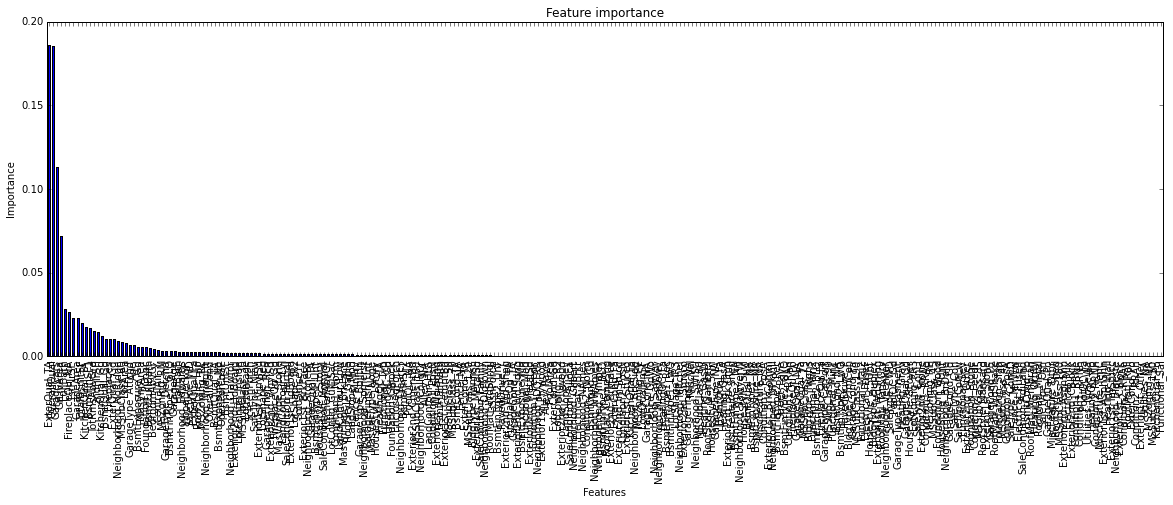

In [28]:
params = {'warm_start': True, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': None,
          'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 140, 'max_features': 0.7,
          'min_weight_fraction_leaf': 0.0, 'criterion': 'mse', 'random_state': 10, 'min_impurity_split': 0,
          'min_samples_split': 3, 'max_depth': None}
reg1 = ExtraTreesRegressor(
                            n_estimators = params['n_estimators'],
                            max_depth = params['max_depth'],
                            max_features = params['max_features'],
                            min_samples_split = params['min_samples_split'],
                            min_samples_leaf = params['min_samples_leaf'],
                            min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                            min_impurity_split = params['min_impurity_split'],
                            bootstrap = params['bootstrap'],
                            oob_score = params['oob_score'],
                            max_leaf_nodes = params['max_leaf_nodes'],
                            criterion = params['criterion'],
                            n_jobs = params['n_jobs'],
                            warm_start = params['warm_start'],
                            verbose = params['verbose'],
                            random_state = params['random_state']
                            )
modelfit(reg1, X_train, y_train)

### Grid search + Genetic programming ( 'sklearn-deap' package )

In [ ]:
params = {
          'n_estimators': range(10,540,10),
          'max_depth': [None],
          'max_features': [i/10.0 for i in range(1,11)],
          'min_samples_split': range(2,9),
          'min_samples_leaf': range(1,9),
          'min_weight_fraction_leaf': [i/100.0 for i in range(0,6)],
          'min_impurity_split': [i/10**8 for i in range(1,101,10)],
          'bootstrap': [True,False],
          'oob_score': [False],
          'max_leaf_nodes': [None],
          'criterion': ['mse'],
          'n_jobs': [-1],
          'warm_start': [True],
          'verbose': [0],
          'random_state': [10]
         }
evol = EvolutionaryAlgorithmSearchCV(estimator=ExtraTreesRegressor(), params=params, cv=10,
        scoring='r2', population_size=50, gene_mutation_prob=0.1, gene_crossover_prob=0.5, tournament_size=3,
        generations_number=10, verbose=True, n_jobs=-1)
evol.fit(X_train, y_train)

In [ ]:
params = {}
reg1 = ExtraTreesRegressor(
                            n_estimators = params['n_estimators'],
                            max_depth = params['max_depth'],
                            max_features = params['max_features'],
                            min_samples_split = params['min_samples_split'],
                            min_samples_leaf = params['min_samples_leaf'],
                            min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                            min_impurity_split = params['min_impurity_split'],
                            bootstrap = params['bootstrap'],
                            oob_score = params['oob_score'],
                            max_leaf_nodes = params['max_leaf_nodes'],
                            criterion = params['criterion'],
                            n_jobs = params['n_jobs'],
                            warm_start = params['warm_start'],
                            verbose = params['verbose'],
                            random_state = params['random_state']
                            )
modelfit(reg1, X_train, y_train)

### Make predictions and save results

In [14]:
test_pred = reg1.predict(X_test)
dictn = {'Id': range(1461,2920), 'SalePrice': test_pred}
res = pd.DataFrame(dictn)
res.to_csv('submission.csv', index=0)